In [139]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [140]:
dataset = pd.read_csv('train.csv')
print(dataset.columns.values)
print(dataset.shape)

['Id' 'MSSubClass' 'MSZoning' 'LotFrontage' 'LotArea' 'Street' 'Alley'
 'LotShape' 'LandContour' 'Utilities' 'LotConfig' 'LandSlope'
 'Neighborhood' 'Condition1' 'Condition2' 'BldgType' 'HouseStyle'
 'OverallQual' 'OverallCond' 'YearBuilt' 'YearRemodAdd' 'RoofStyle'
 'RoofMatl' 'Exterior1st' 'Exterior2nd' 'MasVnrType' 'MasVnrArea'
 'ExterQual' 'ExterCond' 'Foundation' 'BsmtQual' 'BsmtCond' 'BsmtExposure'
 'BsmtFinType1' 'BsmtFinSF1' 'BsmtFinType2' 'BsmtFinSF2' 'BsmtUnfSF'
 'TotalBsmtSF' 'Heating' 'HeatingQC' 'CentralAir' 'Electrical' '1stFlrSF'
 '2ndFlrSF' 'LowQualFinSF' 'GrLivArea' 'BsmtFullBath' 'BsmtHalfBath'
 'FullBath' 'HalfBath' 'BedroomAbvGr' 'KitchenAbvGr' 'KitchenQual'
 'TotRmsAbvGrd' 'Functional' 'Fireplaces' 'FireplaceQu' 'GarageType'
 'GarageYrBlt' 'GarageFinish' 'GarageCars' 'GarageArea' 'GarageQual'
 'GarageCond' 'PavedDrive' 'WoodDeckSF' 'OpenPorchSF' 'EnclosedPorch'
 '3SsnPorch' 'ScreenPorch' 'PoolArea' 'PoolQC' 'Fence' 'MiscFeature'
 'MiscVal' 'MoSold' 'YrSold' 'SaleTy

(array([  18.,  132., 1136.,   58.,    5.,   37.,   60.,    7.,    0.,
           7.]),
 array([ 1. ,  2.4,  3.8,  5.2,  6.6,  8. ,  9.4, 10.8, 12.2, 13.6, 15. ]),
 <BarContainer object of 10 artists>)

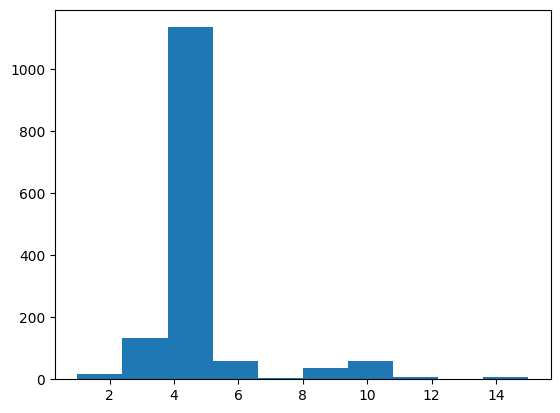

In [141]:
nan_count_per_row = dataset.isna().sum(axis=1)
plt.hist(nan_count_per_row)

<AxesSubplot: >

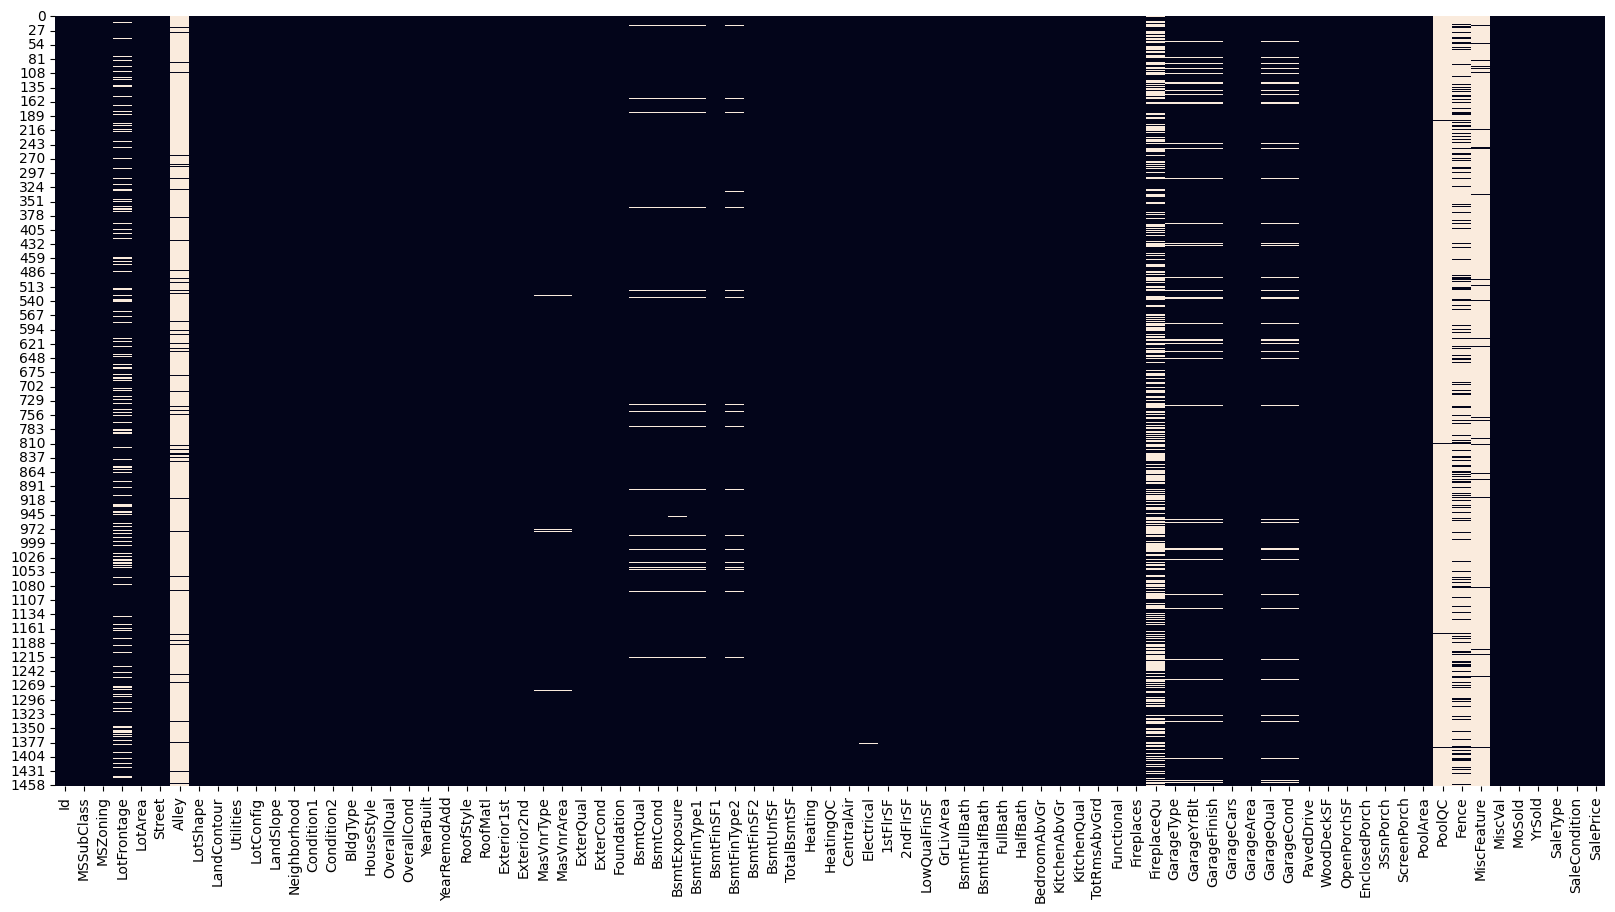

In [142]:
plt.figure(figsize=(20,10))
sns.heatmap(dataset.isna(), cbar=False)

## Visualisation de la target

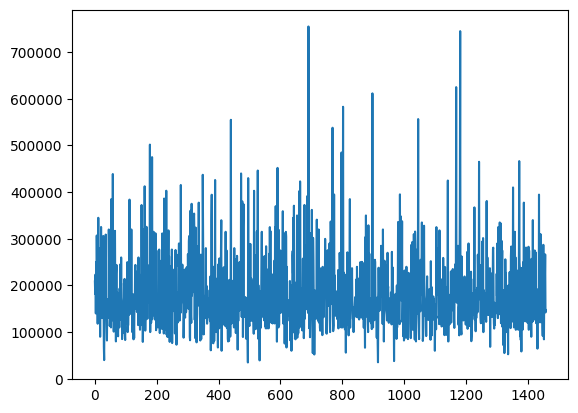

In [143]:
plt.plot(dataset['SalePrice'])

<AxesSubplot: xlabel='SalePrice', ylabel='Count'>

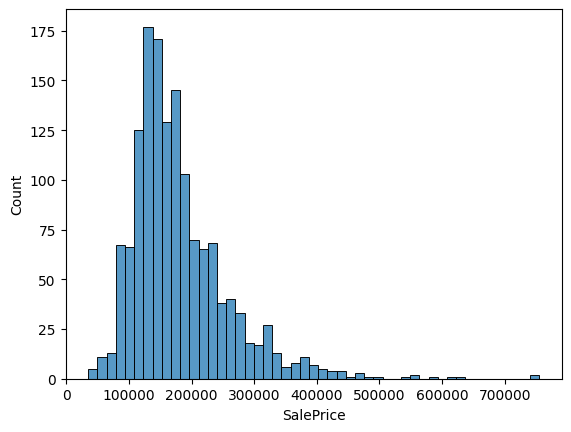

In [144]:
plt.figure()
sns.histplot(dataset['SalePrice'])

C:\Users\Loris Le Bris\AppData\Local\Temp\ipykernel_10944\616686246.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dataset.corr()[['SalePrice']], annot=True, cmap='coolwarm')


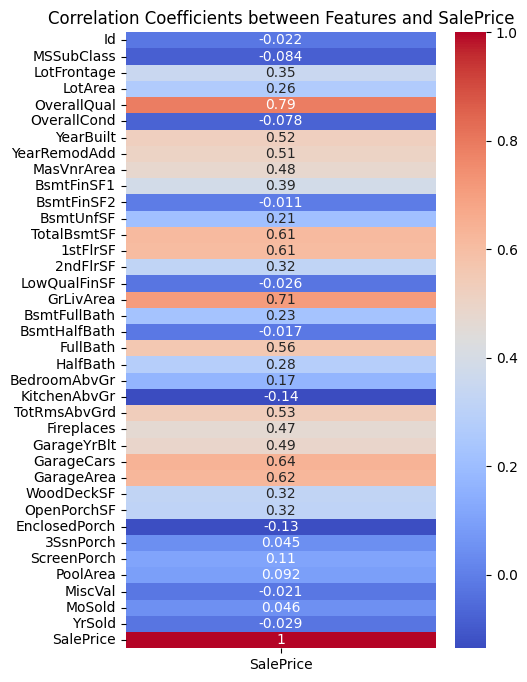

In [145]:
plt.figure(figsize=(5, 8))
sns.heatmap(dataset.corr()[['SalePrice']], annot=True, cmap='coolwarm')
plt.title('Correlation Coefficients between Features and SalePrice')
plt.show()

In [146]:
corr_matrix = dataset.corr()[['SalePrice']]
high_corr_features = corr_matrix[corr_matrix > 0.60]
high_corr_features = high_corr_features.unstack().sort_values(ascending=False)
high_corr_features = high_corr_features[high_corr_features != 1.0]
high_corr_features = high_corr_features.drop_duplicates()
print(high_corr_features)


SalePrice  OverallQual    0.790982
           GrLivArea      0.708624
           GarageCars     0.640409
           GarageArea     0.623431
           TotalBsmtSF    0.613581
           1stFlrSF       0.605852
           Id                  NaN
dtype: float64


C:\Users\Loris Le Bris\AppData\Local\Temp\ipykernel_10944\627541891.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = dataset.corr()[['SalePrice']]


On peut constater qu'il y a une correlation intéressante entre la target et les variaibles numériques suivantes:
- OverallQual
- GrLivArea
- GarageCars
- GarageArea
- TotalBsmtSF
- 1stFlrSF

In [147]:
dataset['KitchenAbvGr'].value_counts()

1    1392
2      65
3       2
0       1
Name: KitchenAbvGr, dtype: int64

In [148]:
dataset.dtypes.value_counts()


object     43
int64      35
float64     3
dtype: int64

## Examination des variables numériques

C:\Users\Loris Le Bris\AppData\Local\Temp\ipykernel_10944\837744631.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


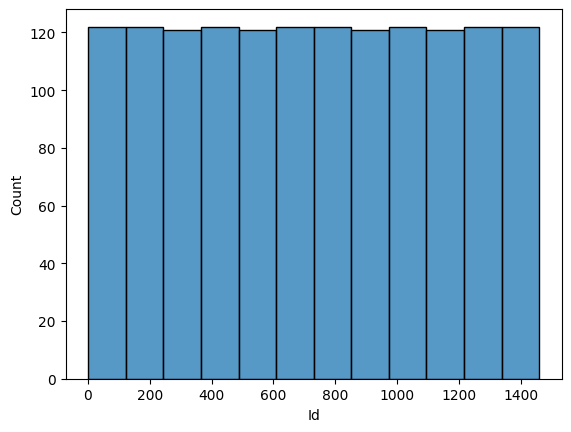

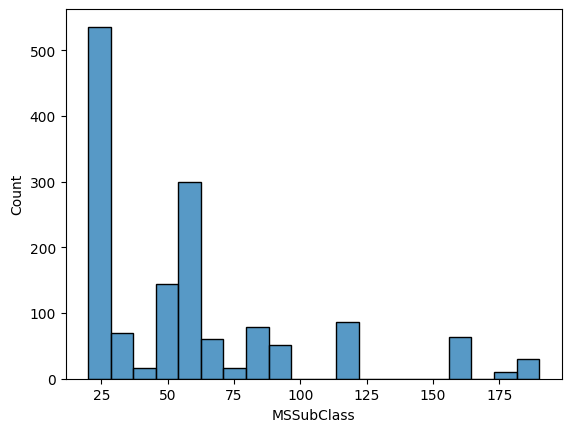

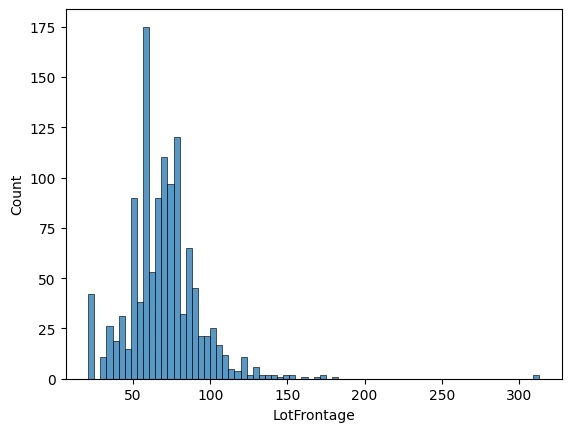

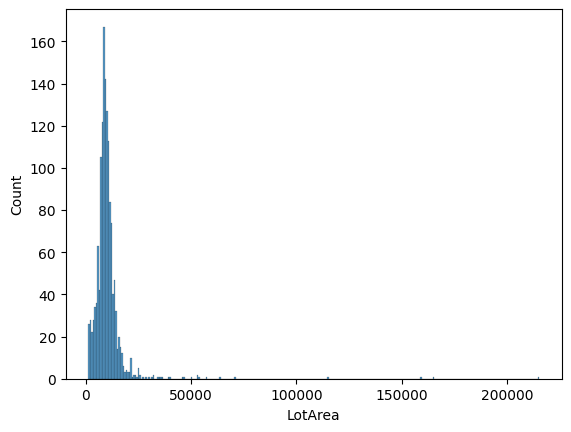

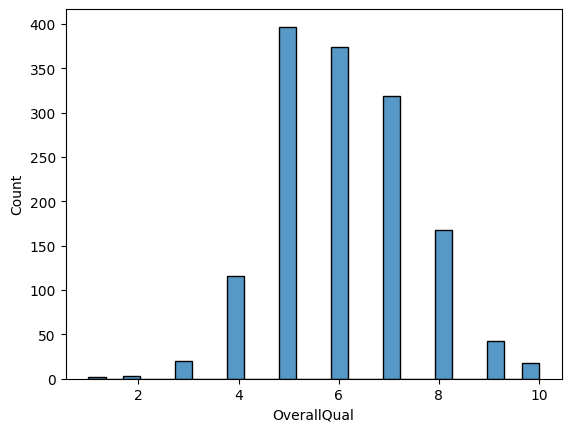

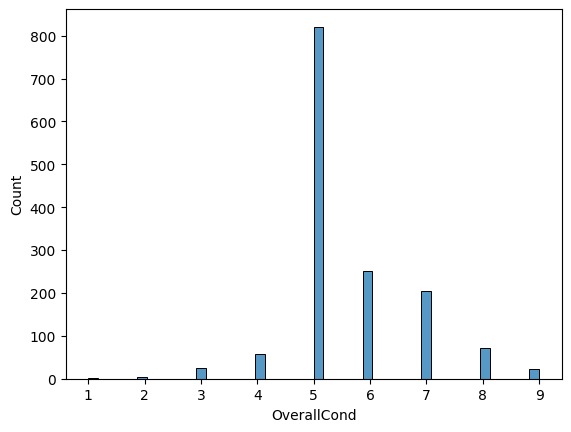

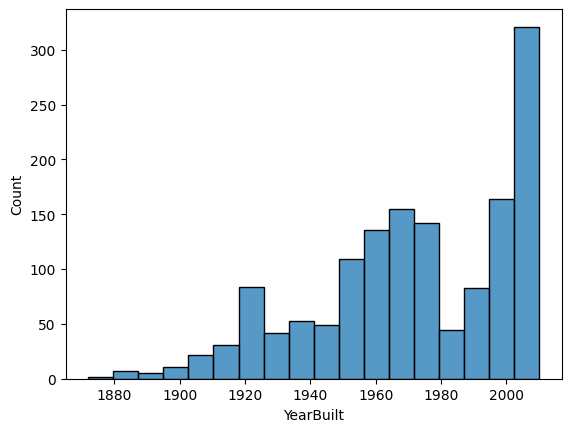

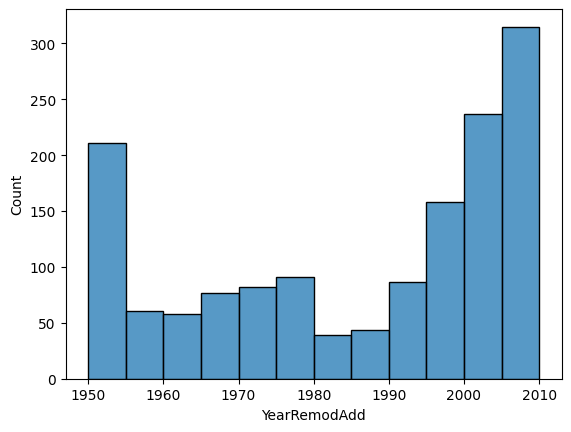

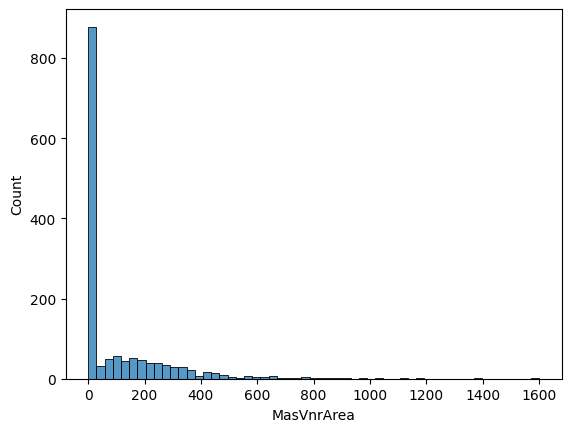

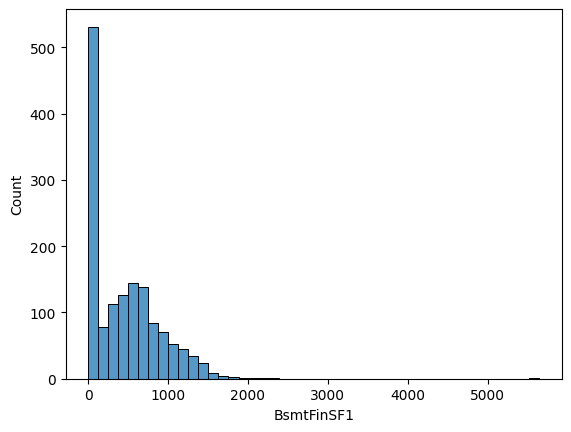

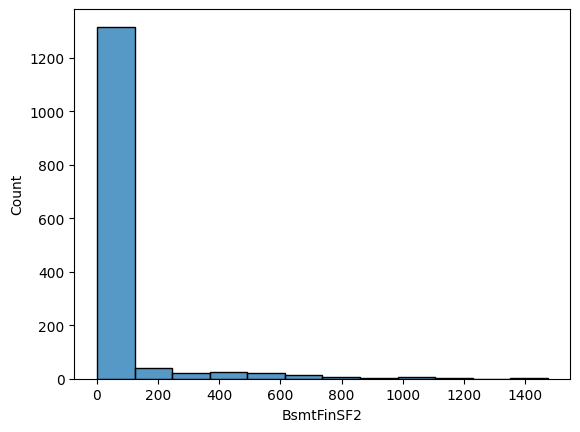

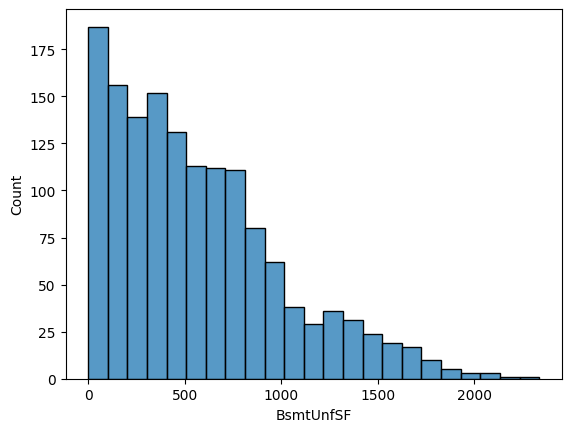

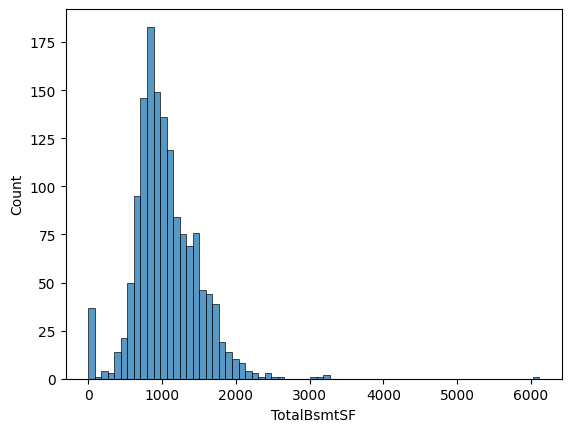

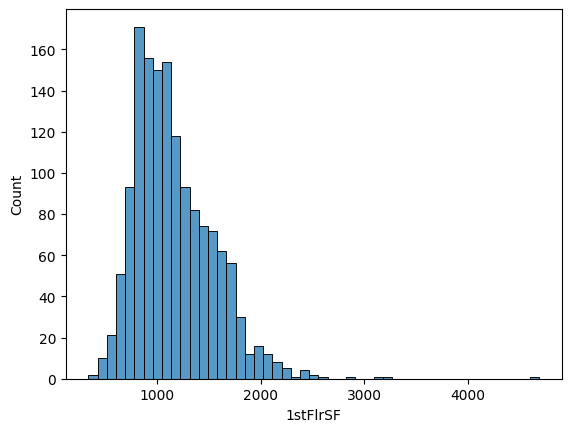

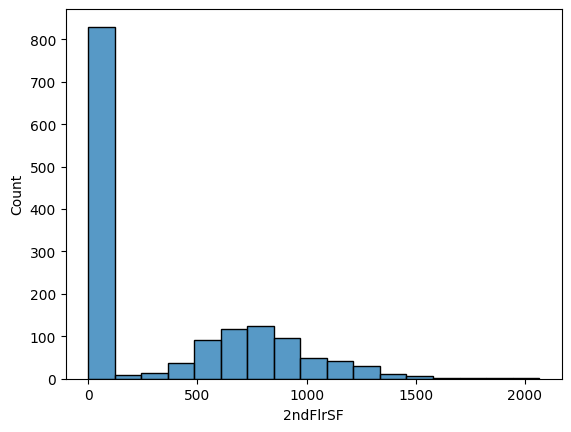

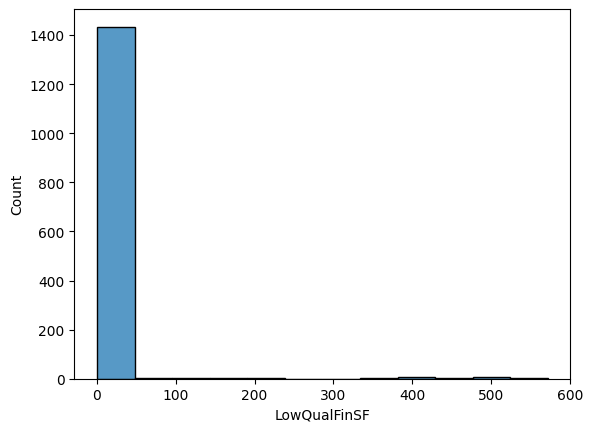

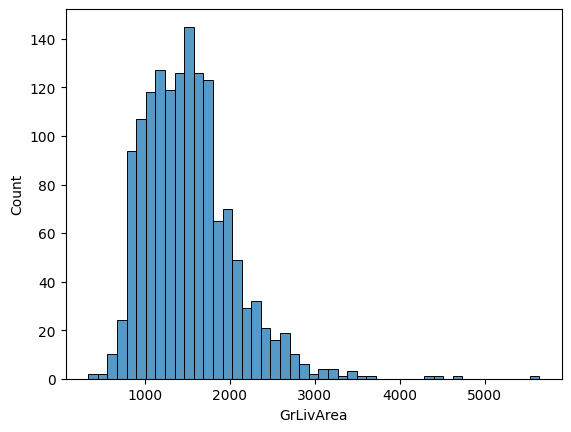

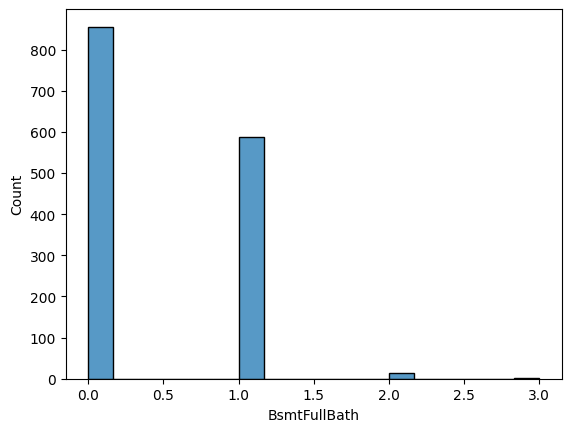

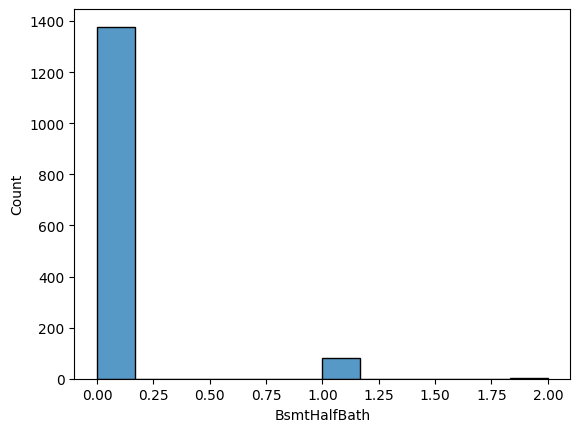

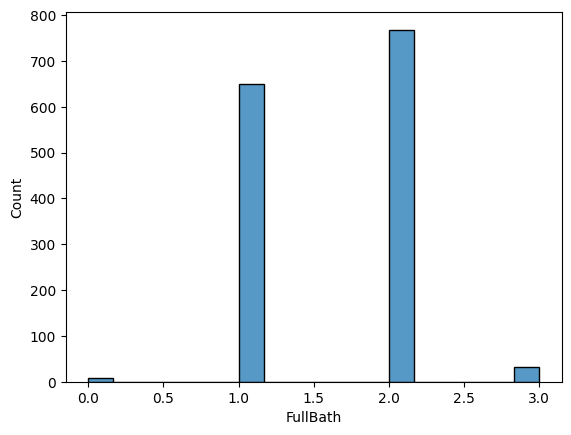

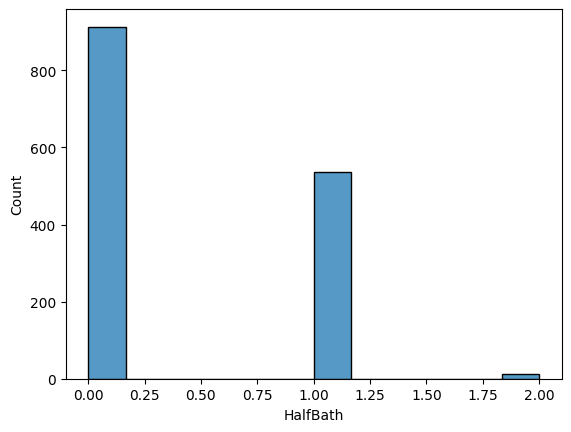

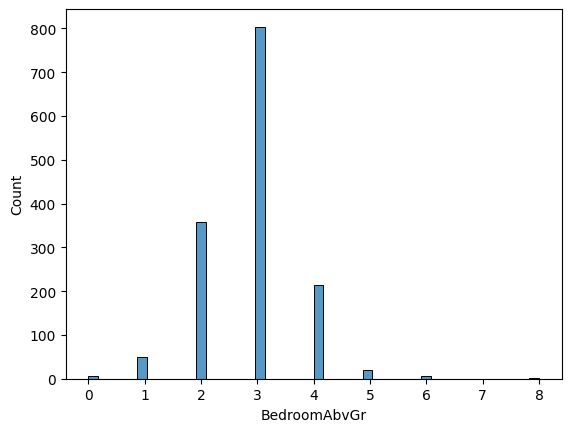

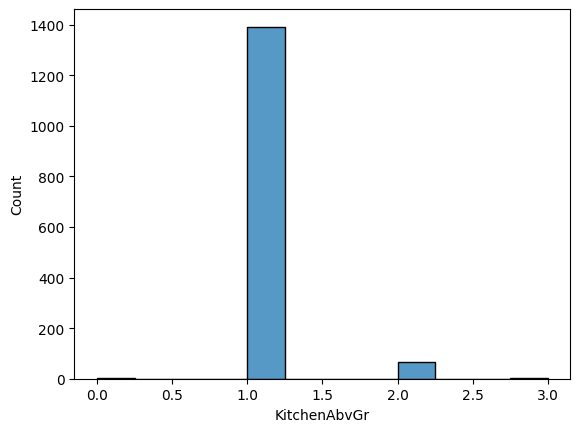

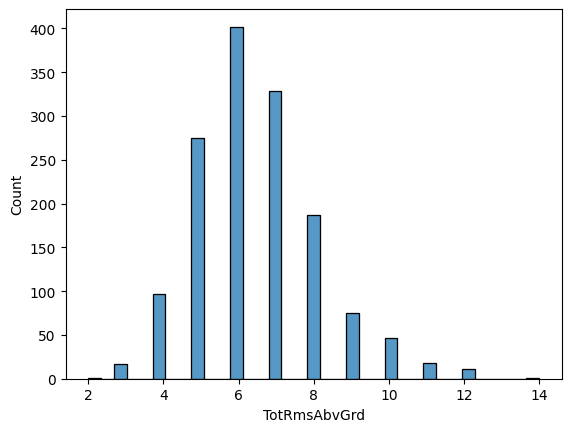

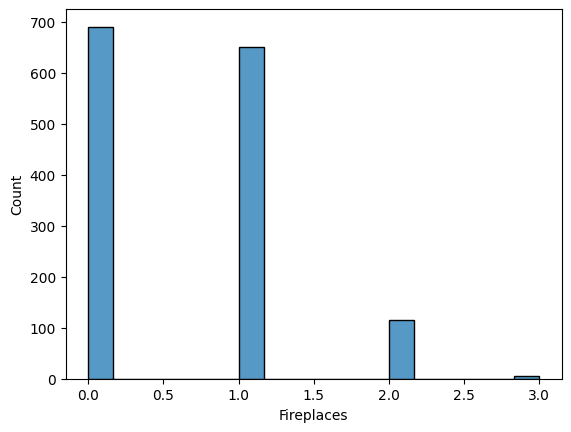

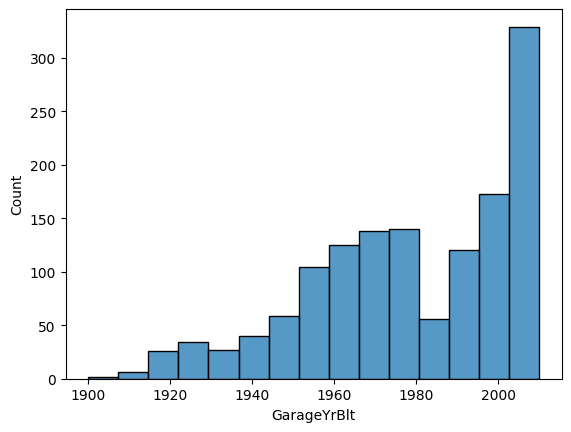

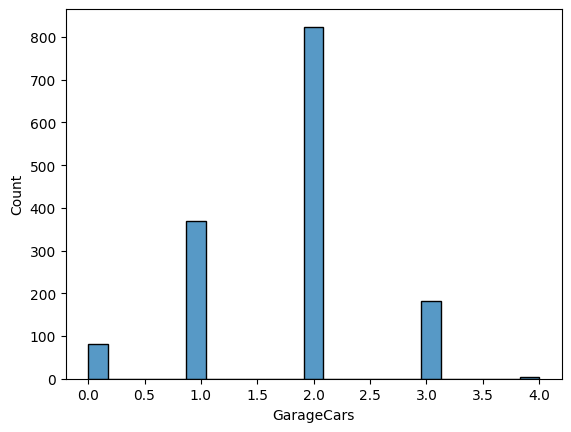

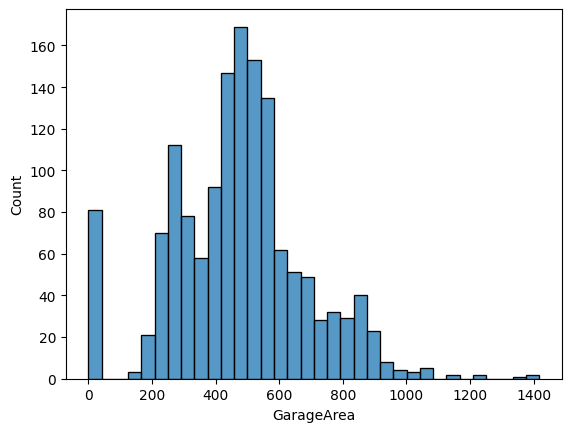

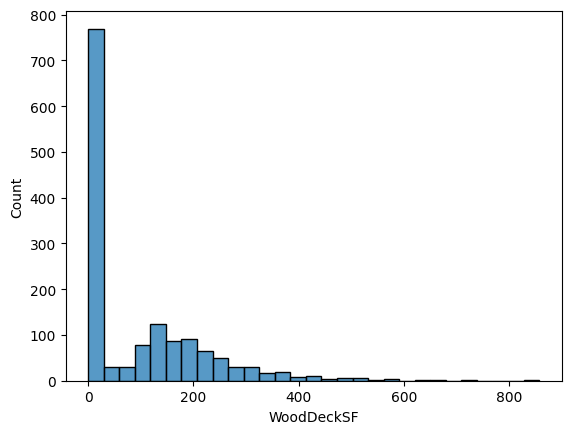

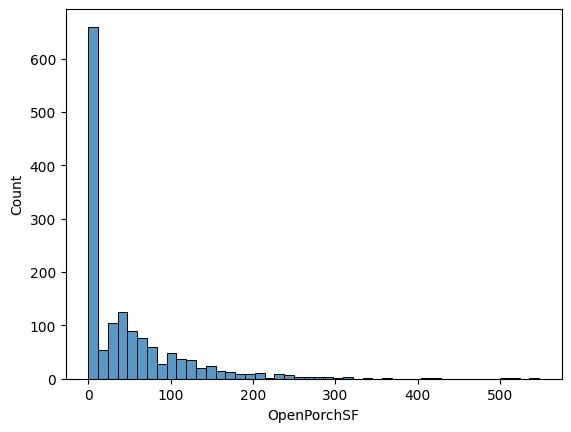

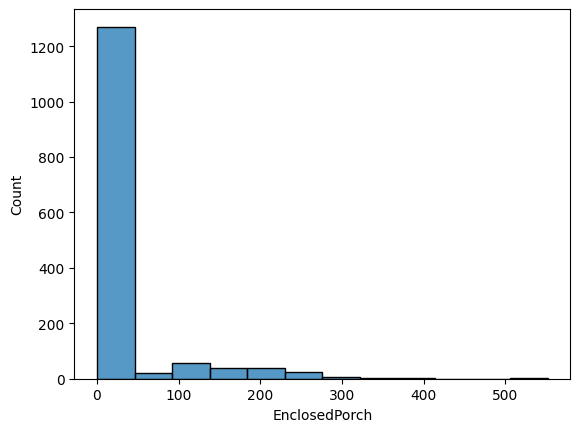

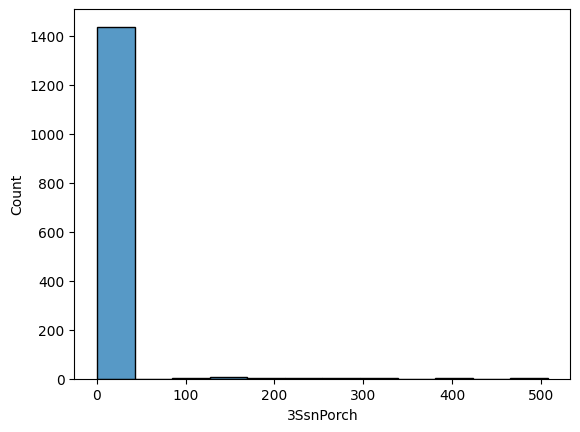

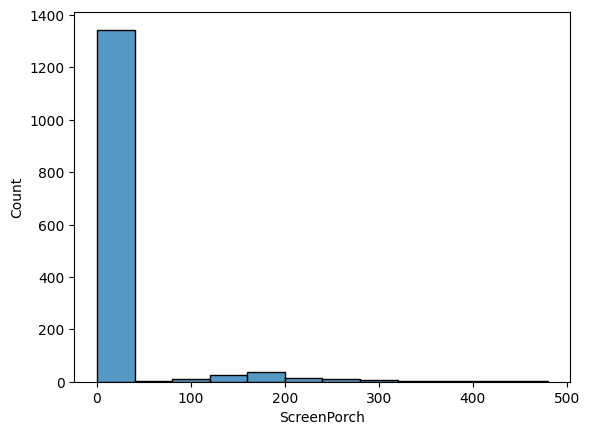

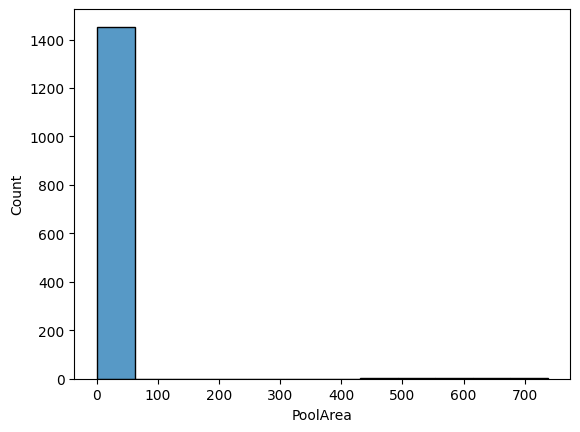

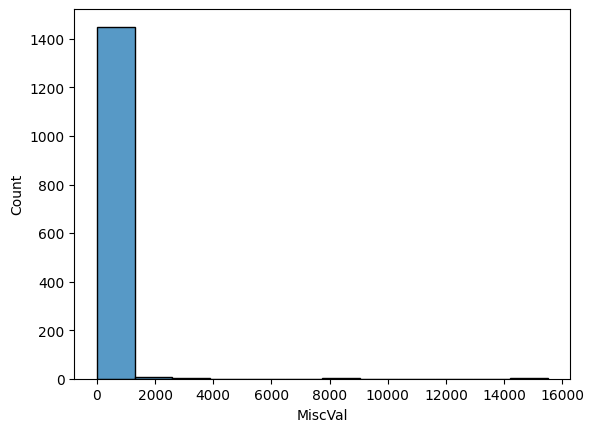

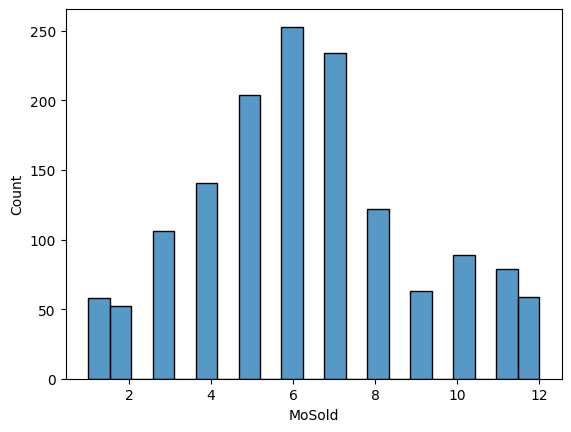

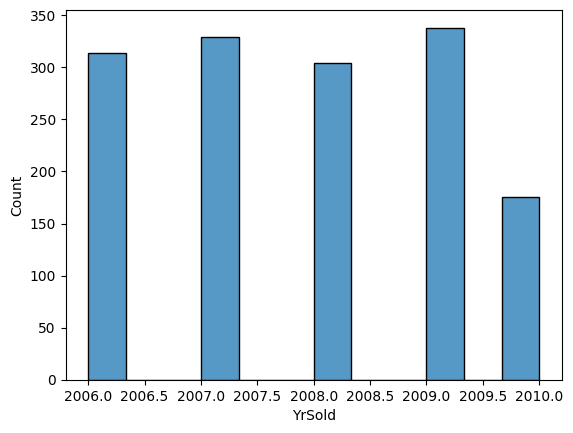

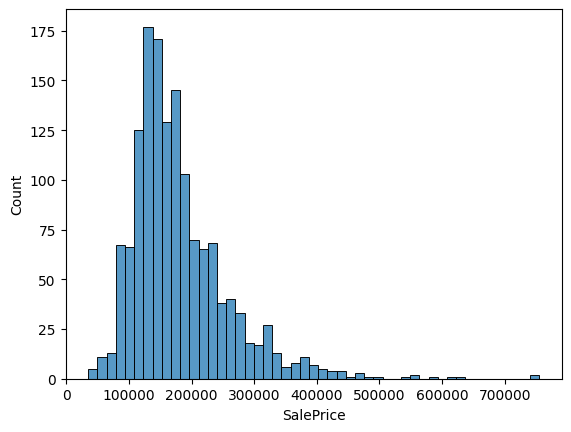

In [149]:
for col in dataset.select_dtypes(['float', 'int']):
    plt.figure()
    sns.histplot(dataset[col])

## Examination des variables discrètes

In [150]:
for col in dataset.select_dtypes('object'):
    print(f'{col :-<50}, {dataset[col].unique()}')

MSZoning------------------------------------------, ['RL' 'RM' 'C (all)' 'FV' 'RH']
Street--------------------------------------------, ['Pave' 'Grvl']
Alley---------------------------------------------, [nan 'Grvl' 'Pave']
LotShape------------------------------------------, ['Reg' 'IR1' 'IR2' 'IR3']
LandContour---------------------------------------, ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities-----------------------------------------, ['AllPub' 'NoSeWa']
LotConfig-----------------------------------------, ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope-----------------------------------------, ['Gtl' 'Mod' 'Sev']
Neighborhood--------------------------------------, ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']
Condition1----------------------------------------, ['Norm' 'Feedr' 'PosN' 'Artery' 

C:\Users\Loris Le Bris\AppData\Local\Temp\ipykernel_10944\62999583.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  discrete_dataset['SalePrice'] = dataset['SalePrice']


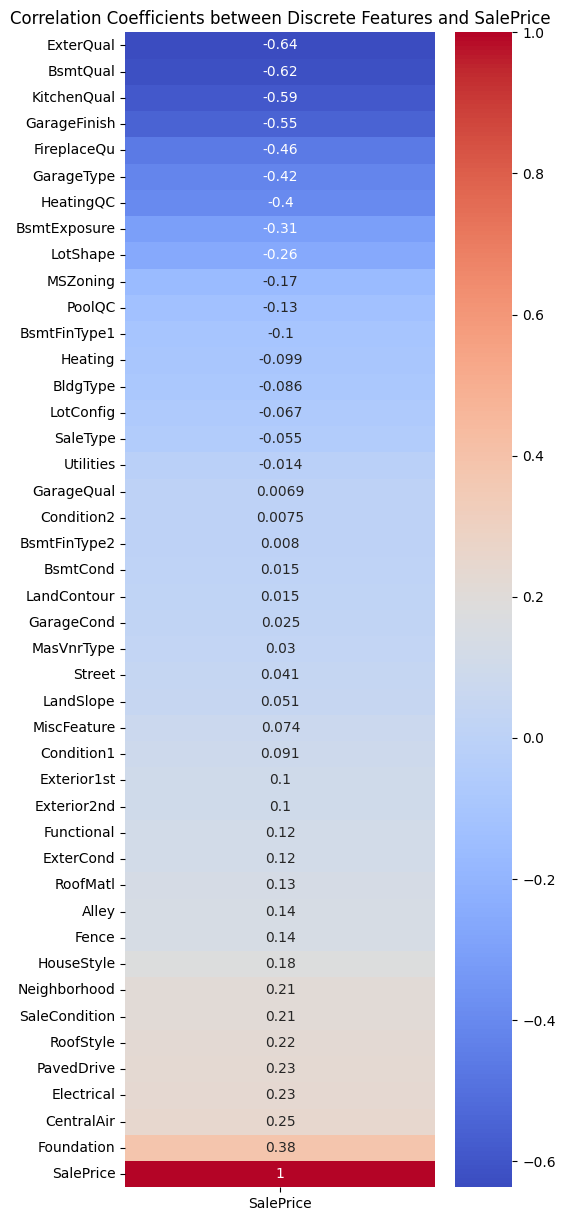

In [151]:
from sklearn.preprocessing import LabelEncoder

discrete_features = dataset.select_dtypes('object').columns
new_dataset = dataset.copy()
label_encoders = {}

for col in discrete_features:
    label_encoders[col] = LabelEncoder()
    new_dataset[col] = label_encoders[col].fit_transform(dataset[col])

discrete_dataset = new_dataset[discrete_features]
discrete_dataset['SalePrice'] = dataset['SalePrice']
discrete_corr_matrix = discrete_dataset.corr()[['SalePrice']]
plt.figure(figsize=(5,15))
sns.heatmap(discrete_corr_matrix.sort_values(by='SalePrice'), annot=True, cmap='coolwarm')
plt.title('Correlation Coefficients between Discrete Features and SalePrice')
plt.show()

C:\Users\Loris Le Bris\AppData\Local\Temp\ipykernel_10944\2472591248.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


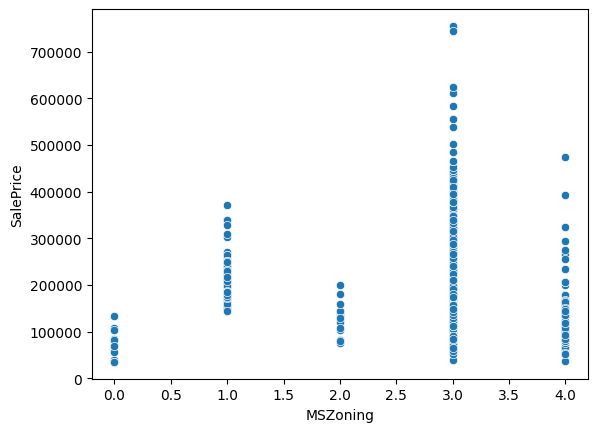

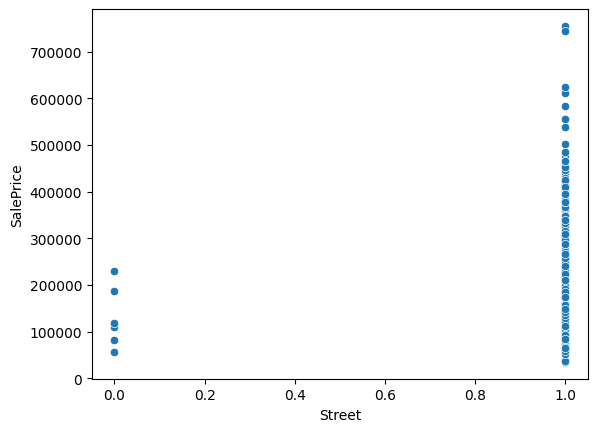

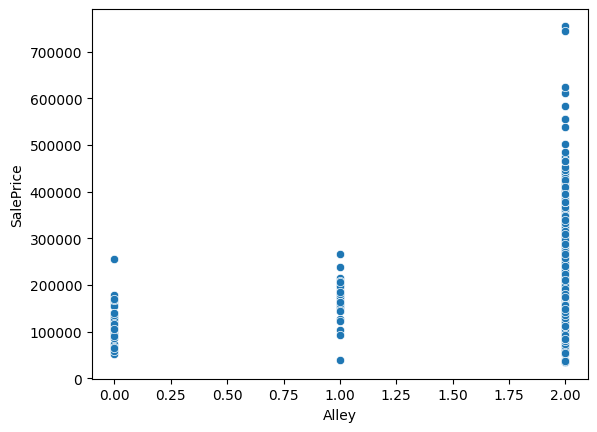

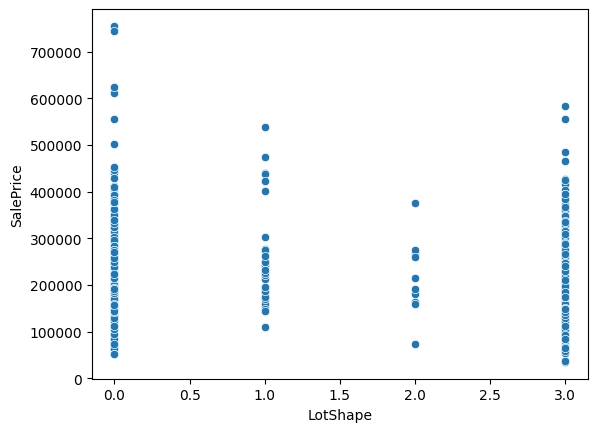

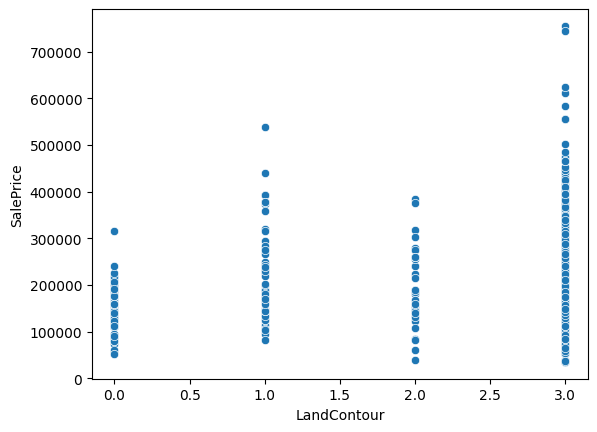

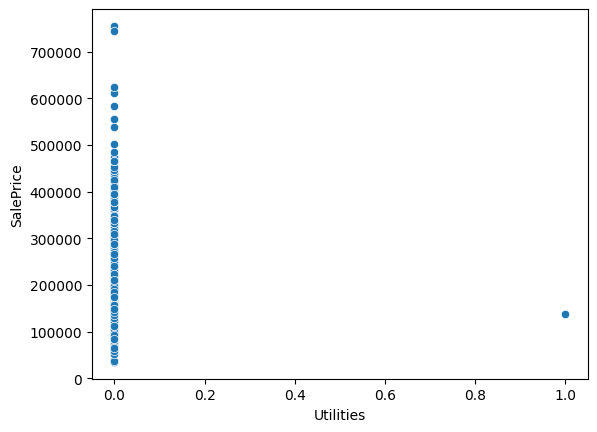

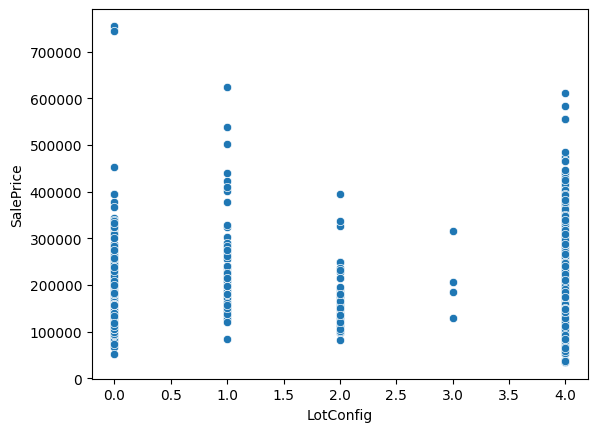

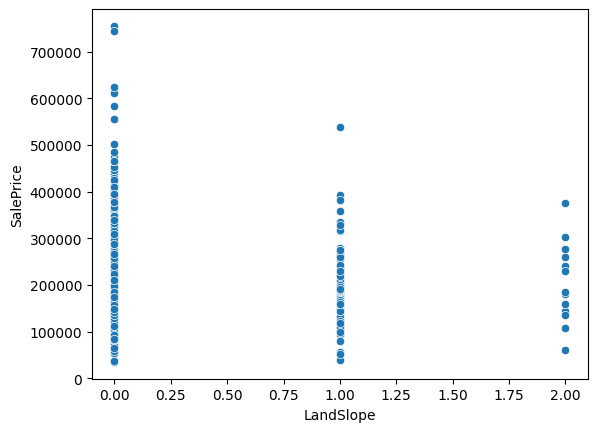

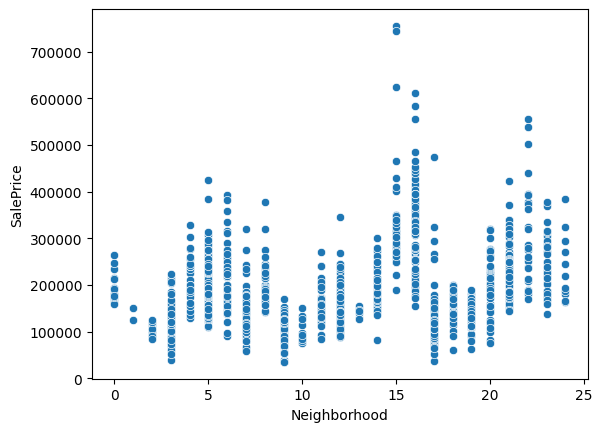

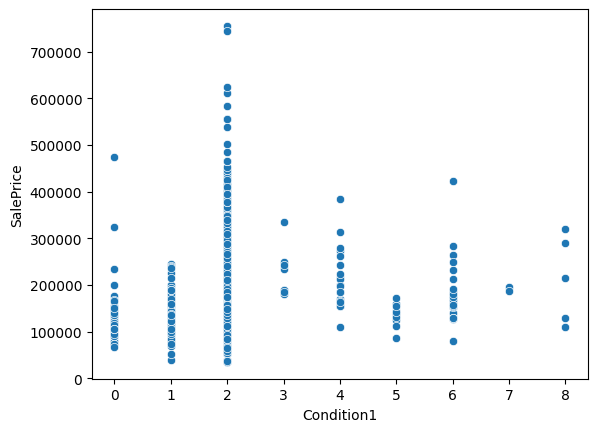

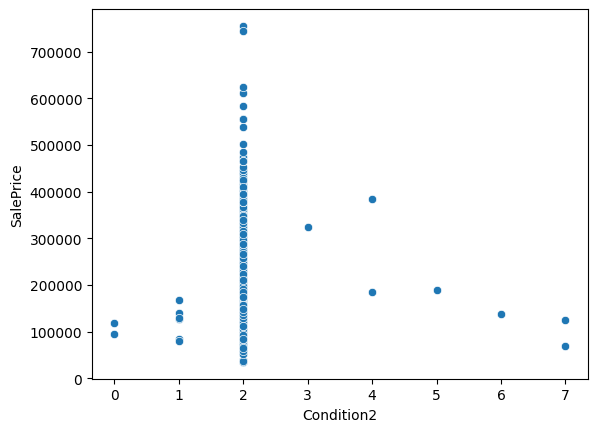

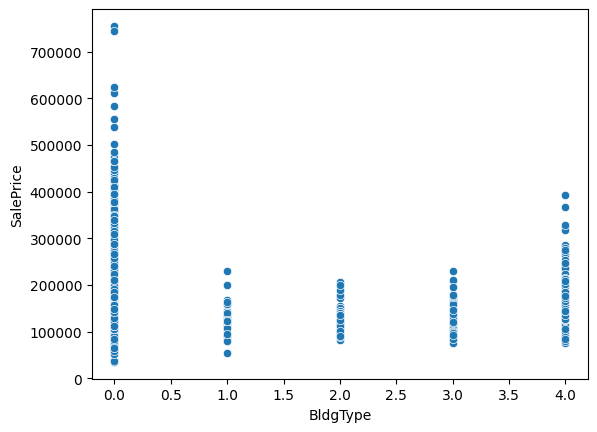

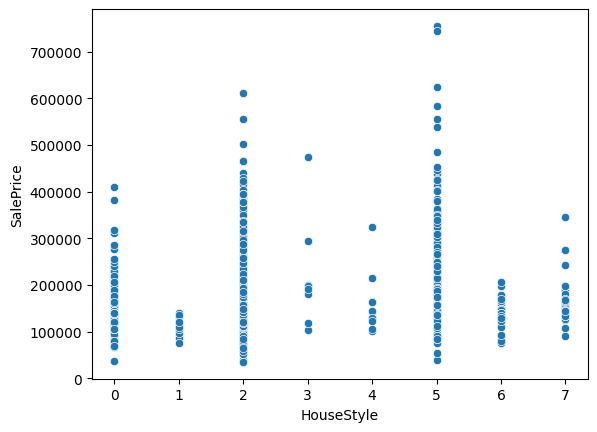

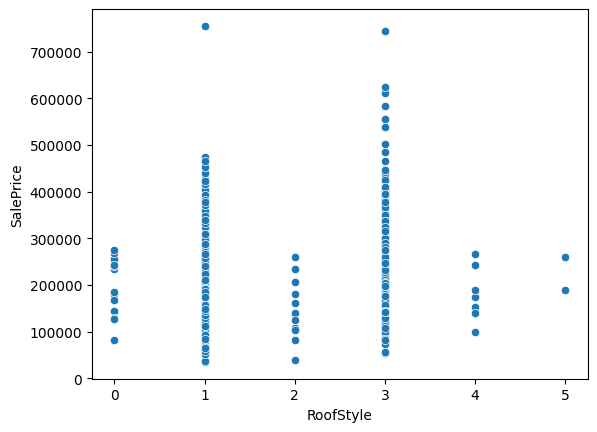

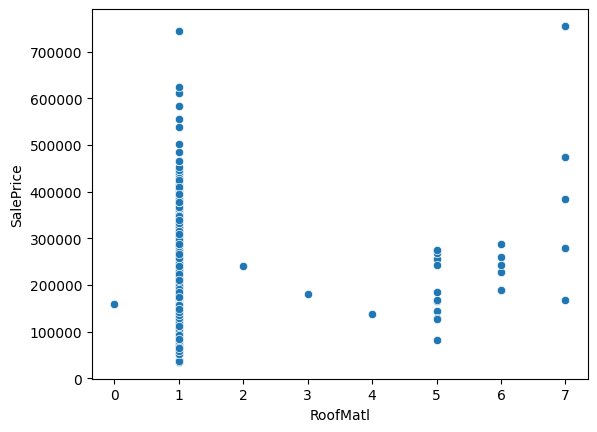

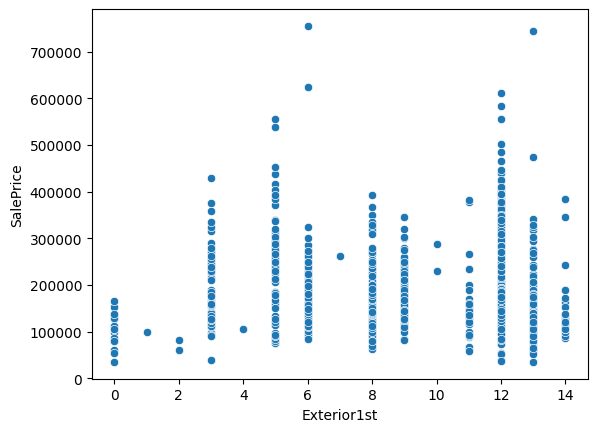

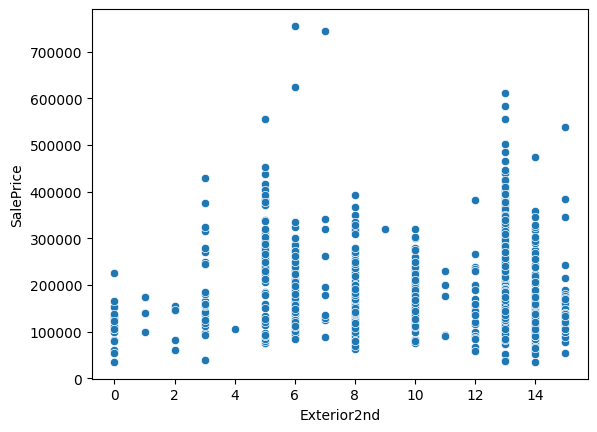

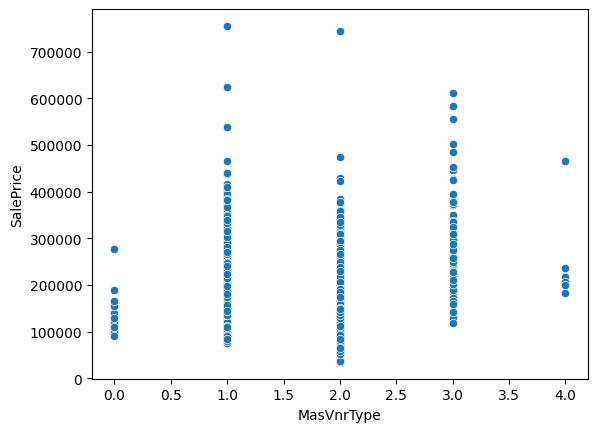

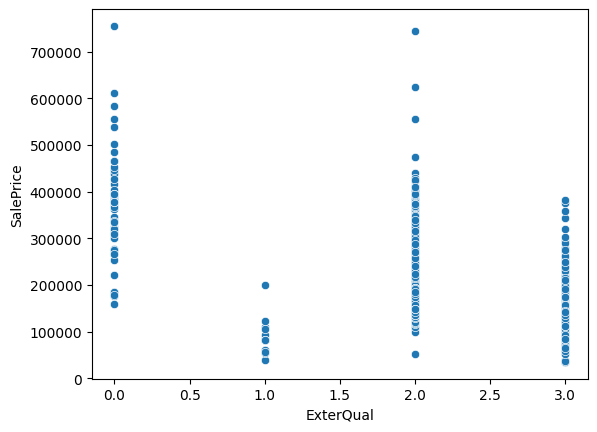

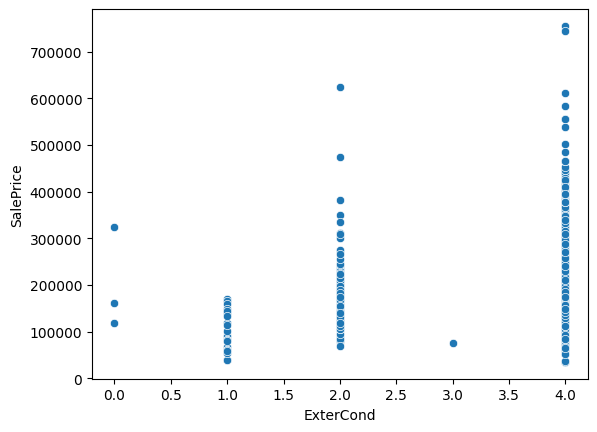

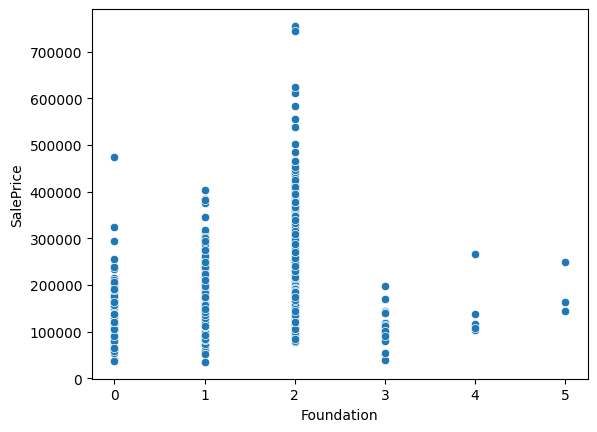

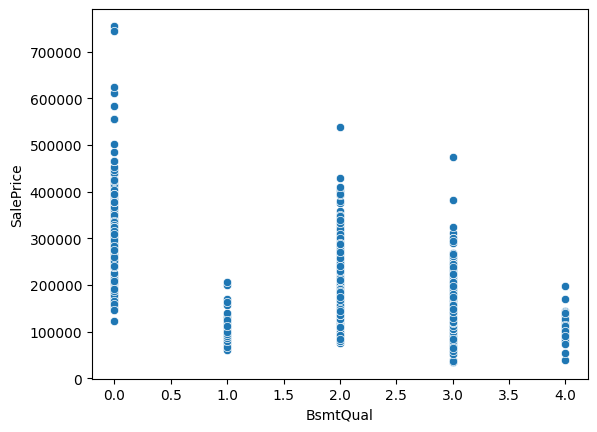

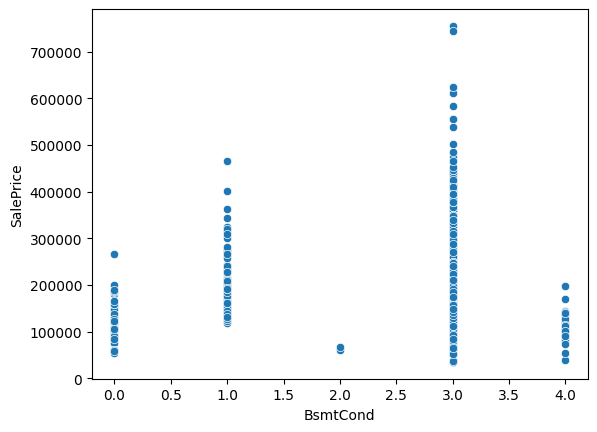

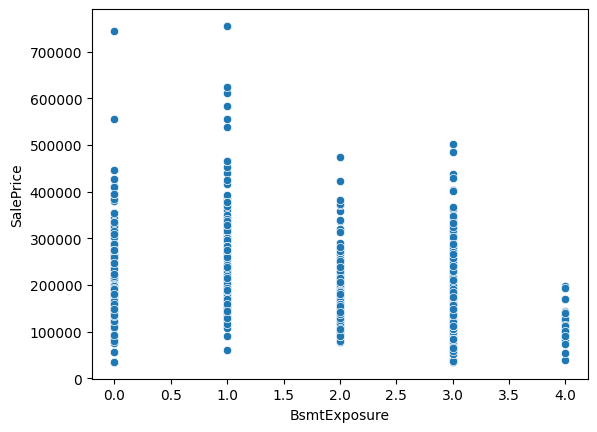

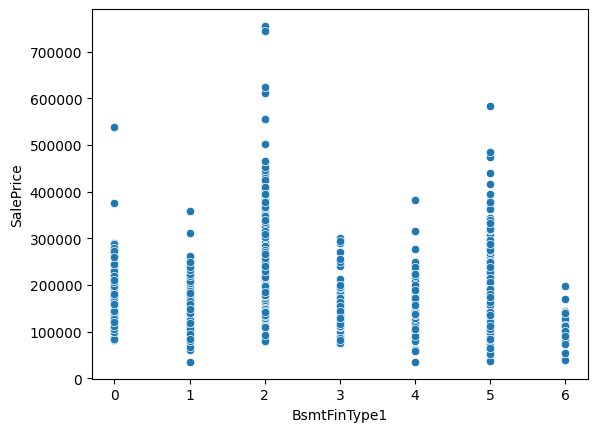

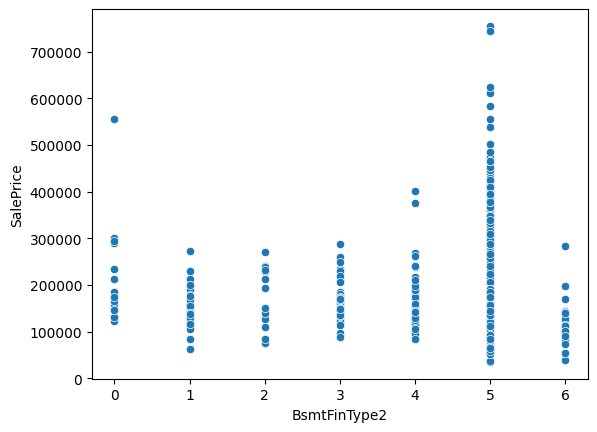

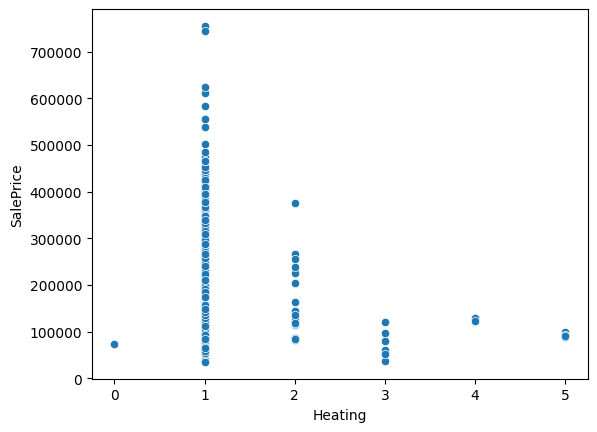

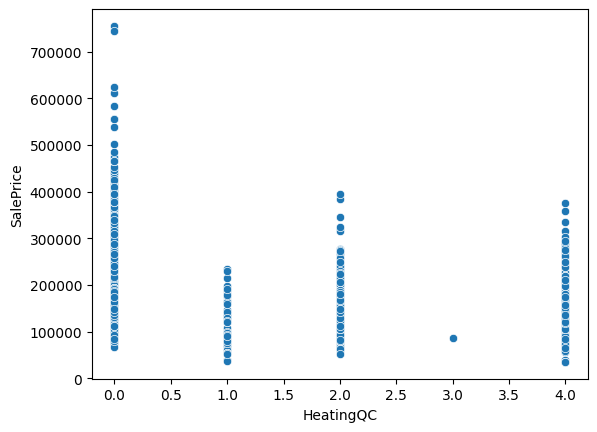

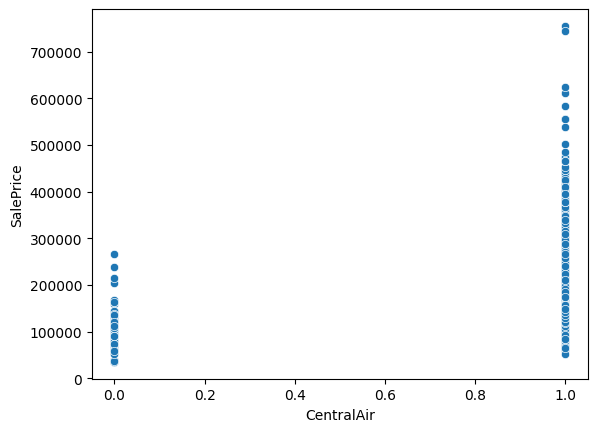

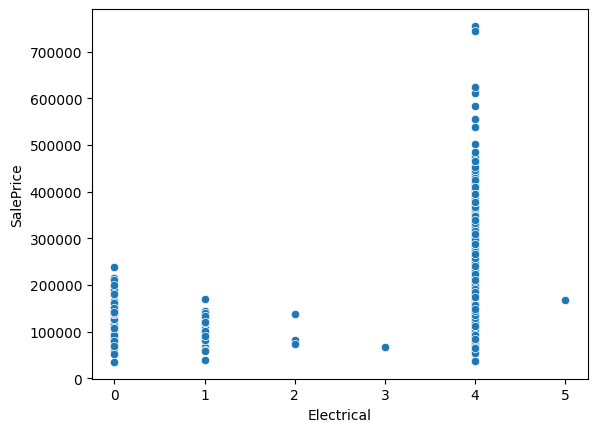

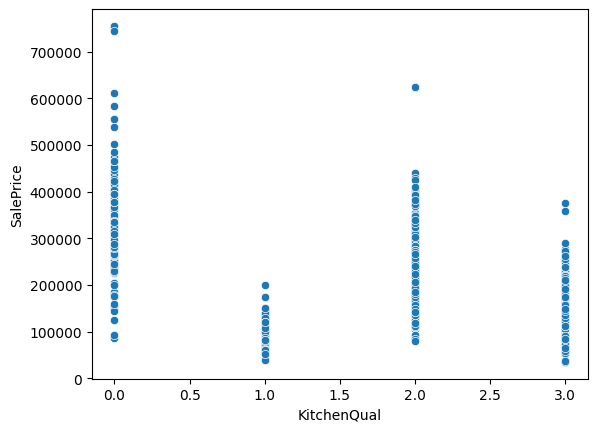

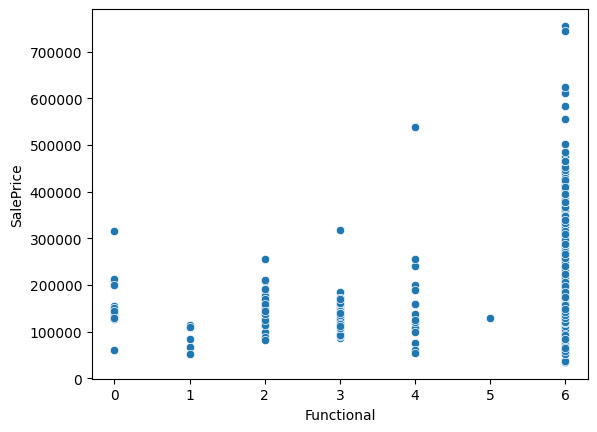

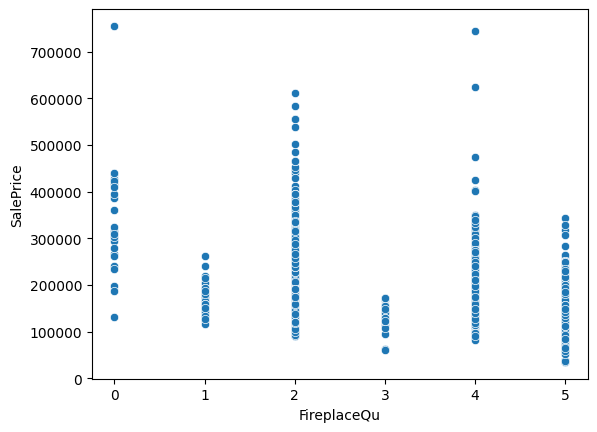

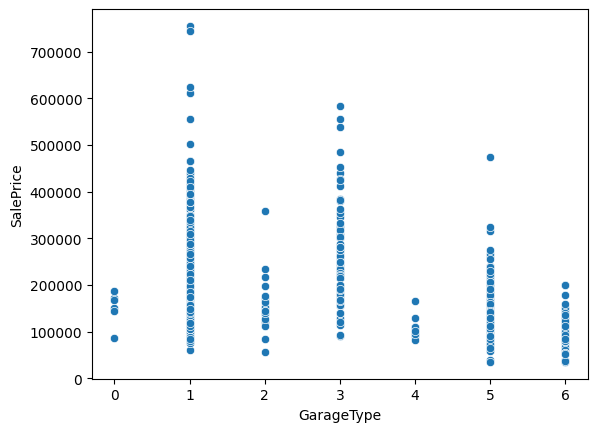

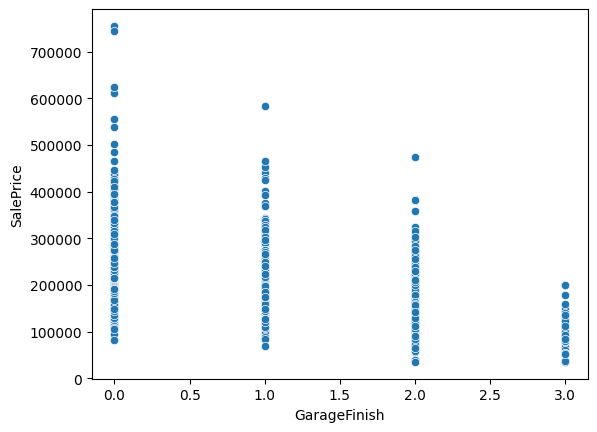

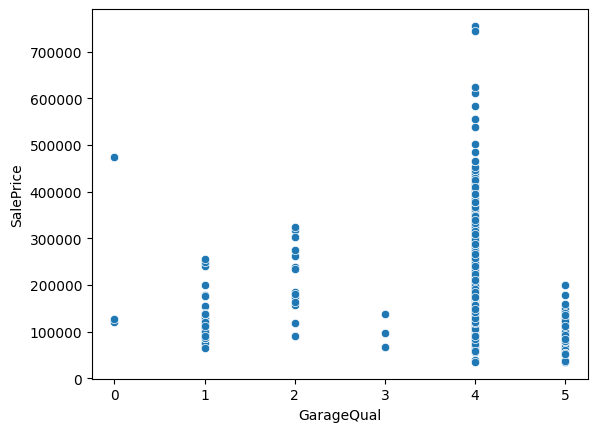

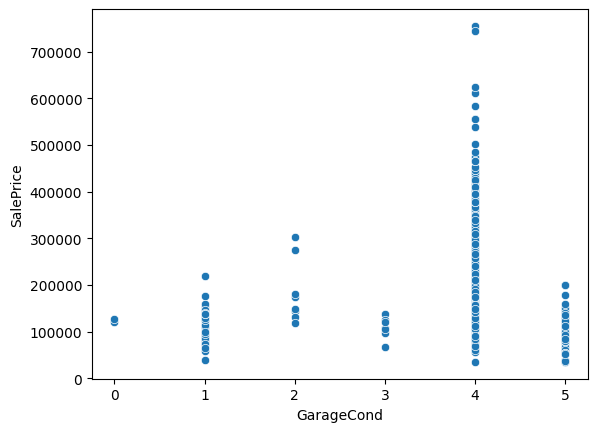

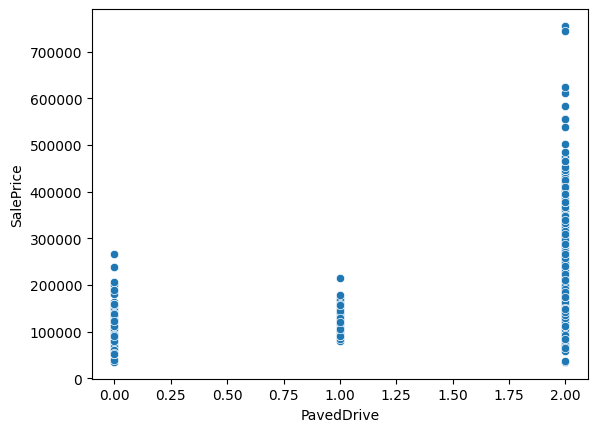

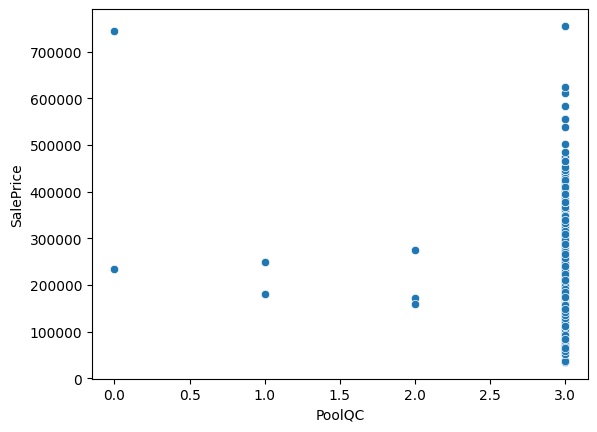

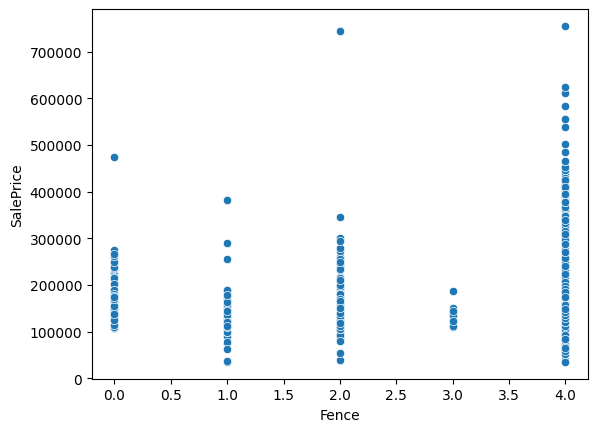

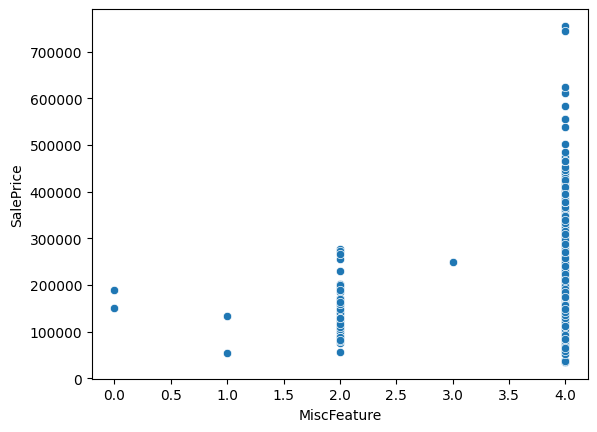

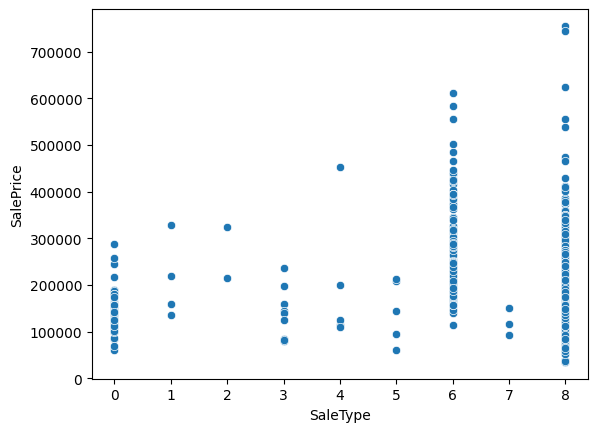

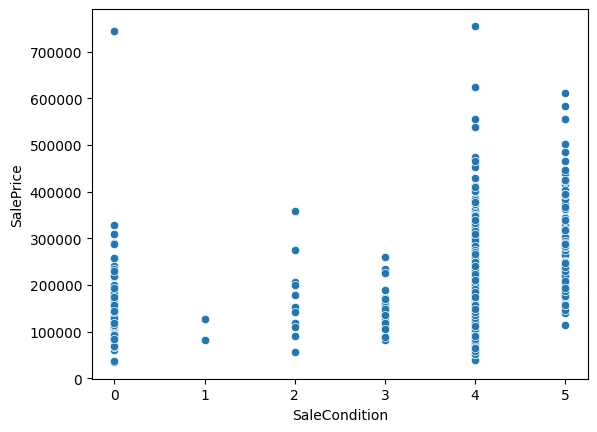

In [152]:
for col in discrete_features:
    plt.figure()
    sns.scatterplot(data=discrete_dataset, x=col, y='SalePrice')


## Comparion variables et target

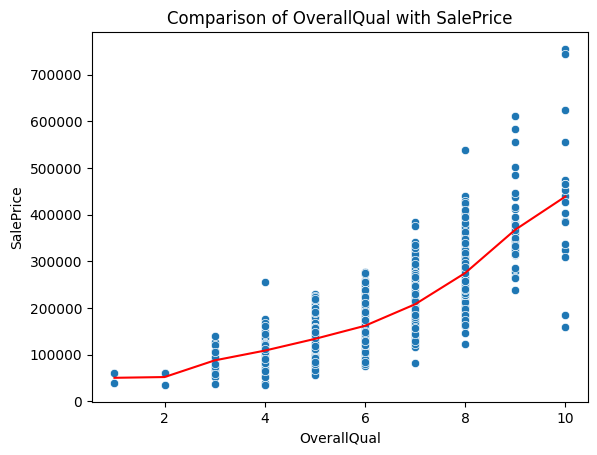

In [153]:
mean_saleprice_by_overallqual = dataset.groupby('OverallQual')['SalePrice'].mean()
sns.scatterplot(data=dataset, x='OverallQual', y='SalePrice')
plt.xlabel('OverallQual')
plt.ylabel('SalePrice')
plt.title('Comparison of OverallQual with SalePrice')
plt.plot(mean_saleprice_by_overallqual, color='red')
plt.show()


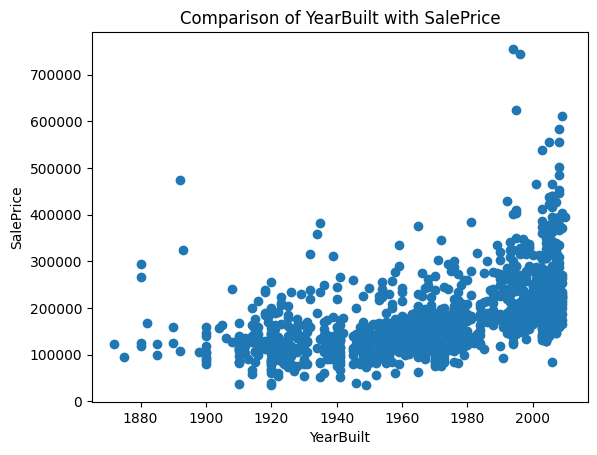

In [154]:
plt.figure()
plt.plot(dataset['YearBuilt'], dataset['SalePrice'], 'o')
plt.xlabel('YearBuilt')
plt.ylabel('SalePrice')
plt.title('Comparison of YearBuilt with SalePrice')
plt.show()